# Conv Benchmark Net

In [1]:
%run '00_README.ipynb'

Imported helper functions from 00_README.ipynb
Imported all modules.
	Tensorflow Version:  2.2.0
	Numpy Version:  1.19.0
	Pandas Version:  1.0.5


In [2]:
import math

training data x shape: (60000, 10, 10, 1)
training data y shape: (60000,)
training data y shape with categories: (60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


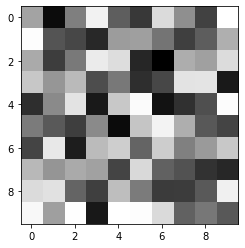

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = np.random.rand(60000, 10, 10, 1)
x_test = np.random.rand(10000, 10, 10, 1)


print("training data x shape:", x_train.shape)
print("training data y shape:", y_train.shape)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("training data y shape with categories:", y_train.shape)

plt.imshow(x_train[312].squeeze(), cmap=plt.cm.gray_r)
print(y_train[312])

In [4]:
x_train_normalized = x_train
x_test_normalized = x_test

#### Set input and output length for later

In [5]:
INPUT_LENGTH = x_test_normalized[1].flatten().shape[0]
OUTPUT_LENGTH = 10

### Create the model
*this can be skipped if the model file is already available*

In [6]:
def create_model(my_learning_rate, kernel_size=3, no_filter=16):
    
    model = tf.keras.models.Sequential()
    #model.add(layers.AveragePooling2D(input_shape=(64,64,1)))
    
    model.add(layers.Conv2D(filters=no_filter, kernel_size=(kernel_size, kernel_size),
                            padding='same',
                            activation='relu', input_shape=(24,24,1)))
    #model.add(layers.AveragePooling2D())
    
    model.add(layers.DepthwiseConv2D(depth_multiplier=1, kernel_size=(kernel_size, kernel_size),
                            padding='same',
                            activation='relu'))
    #model.add(layers.AveragePooling2D())
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units=10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])
    
    model.summary()
    
    return model

In [7]:
def train_model(model, train_features, train_label,
               batch_size=None, validation_split=0.1):
    
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        shuffle=True,
                       validation_split=validation_split)
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

#### Invoke the previous functions to build & train model.

In [22]:
kernel_sizes = [1, 3, 5]
no_filters = range(100, 121, 1)
print(no_filters)

range(100, 121)


In [23]:
batch_size = None
learning_rate = 0.003
validation_split = 0.1

for no_filter in no_filters:
    for kernel_size in kernel_sizes:
        tf_model = create_model(learning_rate, kernel_size=kernel_size, no_filter=no_filter)

        #epochs, hist = train_model(tf_model, x_train_normalized, y_train,
        #                          batch_size, validation_split)

        get_flops(tf_model)
        tf_model.save(f'./keras-model/01f_Depthwise-Conv_F-{no_filter}_K-{kernel_size}.h5')

Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 24, 24, 100)       200       
_________________________________________________________________
depthwise_conv2d_189 (Depthw (None, 24, 24, 100)       200       
_________________________________________________________________
flatten_189 (Flatten)        (None, 57600)             0         
_________________________________________________________________
dense_189 (Dense)            (None, 10)                576010    
Total params: 576,410
Trainable params: 576,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_190 (Conv2D)          (None, 24, 24, 100)       1000      
______________________